# PM2.5 prediction

### Import libraries

In [1]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from scipy.stats import stats
seed(1)
from fs import methods as m
from fs import model as ml
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


### Data Import

---------grid_0_01_0418_0425_2021.gpkg---------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________


2022-05-26 09:03:56.024477: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-26 09:03:56.025880: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


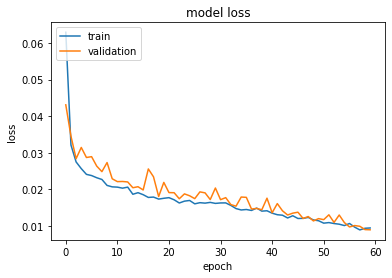

Values predicted:  [[15.848102 ]
 [15.824315 ]
 [16.734322 ]
 [14.502784 ]
 [16.585638 ]
 [17.23953  ]
 [12.3701935]
 [17.452618 ]
 [17.137957 ]
 [16.189043 ]
 [12.628921 ]
 [14.982693 ]
 [18.289904 ]
 [18.528687 ]
 [18.090929 ]
 [22.401829 ]
 [20.303919 ]
 [12.851157 ]
 [18.669643 ]
 [17.574474 ]
 [20.478357 ]
 [16.749327 ]
 [17.606092 ]
 [18.967535 ]
 [18.196827 ]
 [22.840845 ]
 [17.94139  ]
 [15.9596405]
 [16.377962 ]
 [18.446865 ]
 [12.772562 ]
 [15.549258 ]
 [14.045218 ]
 [16.210665 ]
 [19.443401 ]
 [17.908102 ]
 [17.615818 ]
 [18.00103  ]
 [16.659918 ]
 [13.354388 ]
 [14.912296 ]
 [17.824018 ]
 [15.74932  ]
 [17.510754 ]
 [20.898113 ]
 [22.264015 ]
 [16.926523 ]
 [23.962301 ]
 [16.487251 ]
 [17.560987 ]
 [19.940119 ]
 [20.679136 ]
 [15.338587 ]
 [17.981218 ]
 [18.337858 ]
 [18.576962 ]
 [14.454088 ]
 [15.894932 ]
 [14.716125 ]
 [17.570765 ]
 [17.781582 ]
 [22.523985 ]
 [18.879591 ]
 [17.790833 ]
 [18.510962 ]
 [17.84753  ]
 [18.320202 ]
 [21.915823 ]
 [17.023003 ]
 [12.222422 ]
 

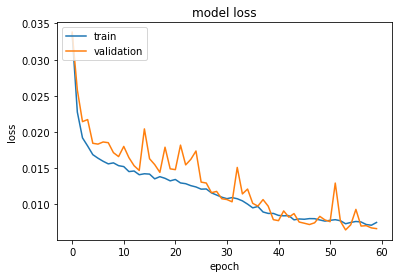

Values predicted:  [[12.076143 ]
 [11.273244 ]
 [25.052103 ]
 [18.99157  ]
 [13.543092 ]
 [20.127403 ]
 [16.360023 ]
 [12.467014 ]
 [16.912794 ]
 [15.705232 ]
 [16.589067 ]
 [19.732529 ]
 [24.077726 ]
 [19.423801 ]
 [21.106215 ]
 [16.331001 ]
 [13.979524 ]
 [17.975763 ]
 [16.933079 ]
 [13.125615 ]
 [10.533344 ]
 [14.303165 ]
 [19.670805 ]
 [21.6501   ]
 [11.352079 ]
 [10.854424 ]
 [15.293543 ]
 [25.506735 ]
 [12.382651 ]
 [17.939486 ]
 [15.378555 ]
 [13.529085 ]
 [11.45025  ]
 [13.331712 ]
 [21.21951  ]
 [13.771461 ]
 [17.759945 ]
 [17.091902 ]
 [14.013978 ]
 [19.327412 ]
 [16.55446  ]
 [12.478777 ]
 [12.410874 ]
 [19.76712  ]
 [12.894882 ]
 [14.633677 ]
 [22.814592 ]
 [14.900633 ]
 [14.497957 ]
 [12.628424 ]
 [11.49227  ]
 [15.270572 ]
 [15.228871 ]
 [19.250702 ]
 [10.085179 ]
 [11.318059 ]
 [13.034587 ]
 [14.369143 ]
 [25.477411 ]
 [16.237335 ]
 [16.352974 ]
 [11.322035 ]
 [15.73387  ]
 [16.634785 ]
 [11.327133 ]
 [15.530367 ]
 [19.92565  ]
 [21.115135 ]
 [24.323729 ]
 [13.791826 ]
 

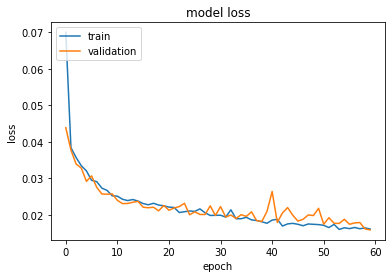

Values predicted:  [[12.920452 ]
 [14.285491 ]
 [ 9.555656 ]
 [13.475969 ]
 [11.477831 ]
 [13.301719 ]
 [ 9.530359 ]
 [13.654674 ]
 [12.517961 ]
 [ 9.992466 ]
 [12.680027 ]
 [11.745091 ]
 [12.824381 ]
 [13.122022 ]
 [13.418054 ]
 [12.983411 ]
 [12.862965 ]
 [ 9.500922 ]
 [12.786746 ]
 [10.007908 ]
 [13.387217 ]
 [10.237063 ]
 [10.154834 ]
 [11.855758 ]
 [12.547027 ]
 [14.895497 ]
 [15.123364 ]
 [13.279009 ]
 [12.085208 ]
 [10.868031 ]
 [14.025446 ]
 [11.920612 ]
 [10.725025 ]
 [13.929484 ]
 [15.699681 ]
 [12.087003 ]
 [13.836809 ]
 [14.100314 ]
 [11.913482 ]
 [12.452627 ]
 [12.889284 ]
 [11.974286 ]
 [11.299205 ]
 [12.369097 ]
 [10.831571 ]
 [13.298496 ]
 [12.6329   ]
 [13.371942 ]
 [13.411005 ]
 [13.013197 ]
 [10.406299 ]
 [11.523049 ]
 [12.319429 ]
 [11.471451 ]
 [13.096693 ]
 [10.738382 ]
 [13.016093 ]
 [12.183758 ]
 [ 8.265188 ]
 [10.184997 ]
 [13.874673 ]
 [12.191725 ]
 [12.554086 ]
 [10.24262  ]
 [11.874701 ]
 [10.360882 ]
 [12.743078 ]
 [15.6858425]
 [11.53907  ]
 [ 9.889346 ]
 

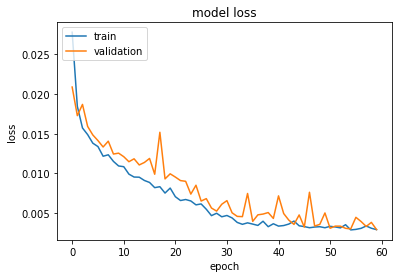

Values predicted:  [[29.660597]
 [30.736773]
 [40.529217]
 [26.038612]
 [30.08007 ]
 [26.474245]
 [26.165848]
 [25.496159]
 [33.958668]
 [42.9664  ]
 [28.68209 ]
 [27.209349]
 [39.917477]
 [26.085745]
 [26.676523]
 [31.520456]
 [25.887762]
 [41.278805]
 [30.541475]
 [24.718025]
 [38.151367]
 [34.425   ]
 [25.510557]
 [28.472578]
 [25.461014]
 [36.48335 ]
 [19.817127]
 [29.08014 ]
 [34.883415]
 [28.54223 ]
 [37.1325  ]
 [34.54061 ]
 [38.924965]
 [28.09003 ]
 [20.640112]
 [28.68432 ]
 [38.752235]
 [40.457985]
 [33.23464 ]
 [41.128258]
 [25.966625]
 [25.871214]
 [30.80574 ]
 [25.58839 ]
 [34.657593]
 [30.675968]
 [26.651962]
 [31.863503]
 [26.583246]
 [27.853872]
 [40.316345]
 [33.256485]
 [26.694197]
 [24.681154]
 [32.232704]
 [27.835417]
 [25.734768]
 [31.40419 ]
 [32.974815]
 [33.91448 ]
 [25.432037]
 [40.398808]
 [25.005823]
 [28.20095 ]
 [27.191587]
 [43.334976]
 [26.24841 ]
 [32.333775]
 [31.520805]
 [28.47001 ]
 [30.13315 ]
 [39.377625]
 [30.260777]
 [26.010267]
 [30.431334]
 [28.8

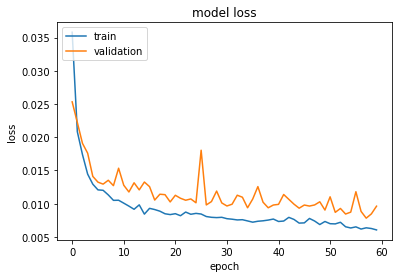

Values predicted:  [[21.042479 ]
 [22.810022 ]
 [29.0191   ]
 [24.69096  ]
 [16.06269  ]
 [18.292513 ]
 [18.24731  ]
 [21.71942  ]
 [21.344547 ]
 [19.469313 ]
 [13.3507395]
 [21.511751 ]
 [16.698755 ]
 [10.433535 ]
 [24.036978 ]
 [17.027742 ]
 [13.092022 ]
 [18.842781 ]
 [22.776388 ]
 [17.809134 ]
 [17.668478 ]
 [16.952509 ]
 [16.326765 ]
 [12.157027 ]
 [18.525942 ]
 [23.335361 ]
 [14.528988 ]
 [15.15381  ]
 [17.372301 ]
 [22.078968 ]
 [15.722925 ]
 [18.294077 ]
 [29.042534 ]
 [21.218798 ]
 [15.008155 ]
 [10.425127 ]
 [17.69938  ]
 [18.294683 ]
 [18.103493 ]
 [18.543753 ]
 [21.92124  ]
 [11.30696  ]
 [23.111319 ]
 [23.844097 ]
 [17.148525 ]
 [17.655338 ]
 [10.363182 ]
 [17.20946  ]
 [20.51518  ]
 [23.340816 ]
 [17.037863 ]
 [14.55643  ]
 [16.982172 ]
 [12.377399 ]
 [21.291103 ]
 [18.159369 ]
 [19.628849 ]
 [15.134558 ]
 [18.553614 ]
 [16.205328 ]
 [23.188826 ]
 [21.103247 ]
 [20.90797  ]
 [22.865276 ]
 [16.420542 ]
 [18.239197 ]
 [13.441552 ]
 [12.451386 ]
 [25.598614 ]
 [17.062992 ]
 

In [2]:
"""
1-->Pearson
2-->Spearmanr
3-->Kendall
4-->Fisher
5-->Random Forest
6-->Average
"""
FOLDER=''
RESOLUTION = '0_01'
TARGET = 'pm25_st'
KNN = True
knn_value=30
NUMBER_OF_COVARIATES = 12


geopackages = os.listdir('assets/grids_'+RESOLUTION)


results1 = pd.DataFrame(columns=['MAE', 'MSE', 'mean Y-Test', 'mean Y-predicted', 'R2'])
results2 = pd.DataFrame(columns=['MAE', 'MSE', 'mean Y-Test', 'mean Y-predicted', 'R2'])



for index, grid in enumerate(geopackages):
    data = gpd.read_file('assets/grids_'+RESOLUTION+'/'+ grid)

    if KNN:
        data = m.process_data(data, knn_value)

    coll = pd.DataFrame()
    coll['pm25_st'] = data['pm25_st']
    coll['pm25_cams'] = data['pm25_cams']
    coll = coll.dropna(axis=0)

    #print('Mean Absolute Error: ',mean_absolute_error(coll['pm25_cams'], coll['pm25_st'], ))
    #print('Mean Squared Error: ',mean_squared_error(coll['pm25_cams'], coll['pm25_st']))
    #print('R2 score: ',r2_score(coll['pm25_cams'], coll['pm25_st']))

    data = data[~data[TARGET].isnull()]
    data = data.dropna(axis=1)

    data.pop('geometry')

    labels = pd.read_csv('assets/features_'+RESOLUTION+'/'+FOLDER+ '/+grid[:-5]+.csv')['Features']
    #labels = pd.read_csv('fs.csv')['Features']

    #read variables which are not null
    score_results = pd.DataFrame()

    #Store dataset in x and y variables
    X = pd.DataFrame(data=data, columns=labels ).dropna(axis = 1)
    X = X.iloc[:, :NUMBER_OF_COVARIATES]

    Y = pd.DataFrame(data=data, columns=[TARGET] )
    Y = Y.values.ravel()


    #NUMBER_OF_COVARIATES = X.shape[1]
    y1 = np.array(Y)

    X_train, X_val, y_train, y_val = train_test_split(X, y1, test_size=0.30)

    y_train=np.reshape(y_train, (-1,1))
    y_val=np.reshape(y_val, (-1,1))

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    scaler_x.fit(X_train)
    xtrain_scale=scaler_x.transform(X_train)
    scaler_x.fit(X_val)
    xval_scale=scaler_x.transform(X_val)

    scaler_y.fit(y_train)
    ytrain_scale=scaler_y.transform(y_train)
    scaler_y.fit(y_val)
    yval_scale=scaler_y.transform(y_val)


    print('---------'+ grid +'---------')

    model = None
    model = Sequential()
    model.add(Dense(NUMBER_OF_COVARIATES, input_dim=NUMBER_OF_COVARIATES, kernel_initializer='normal', activation='relu'))
    model.add(Dense(NUMBER_OF_COVARIATES/2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()

    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

    history=model.fit(xtrain_scale, ytrain_scale, epochs=60, batch_size=1, verbose=0, validation_split=0.30)
    predictions = model.predict(xval_scale)

    print(history.history.keys())
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.plot(history.history['accuracy'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    predictions = scaler_y.inverse_transform(predictions)


    results1.loc[index]= [round(mean_absolute_error(y_val, predictions),3), round(mean_squared_error(y_val, predictions),3), round(np.mean(y_val), 3), round(np.mean(predictions), 3), round(r2_score(y_val, predictions), 3)]
    results1.rename(index={index: grid}, inplace=True)





    print('Values predicted: ', predictions)
    print('Values : ', scaler_y.inverse_transform(yval_scale))
    print('---------VALIDATION WITH ARPA (TEST_SET)---------')

    print('Mean Absolute Error: ',mean_absolute_error(y_val, predictions))
    print('Mean Squared Error: ',mean_squared_error(y_val, predictions))
    print('Mean (Y-test):',np.mean(y_val))
    print('Mean (Y-predicted): ',np.mean(predictions))
    print('R2 score: ',r2_score(y_val, predictions))

    #%%

    data_new = gpd.read_file('assets/grids_'+RESOLUTION+'/'+ grid)
    data_new = data_new[~data_new[TARGET].isnull()]
    pm25_obs = data_new['pm25_st']
    X_new = pd.DataFrame(data=data_new, columns=labels).dropna(axis=1)
    X_new = X_new.iloc[:, :NUMBER_OF_COVARIATES]

    scaler_x = MinMaxScaler()
    scaler_x.fit(X_new)
    X_new_scale=scaler_x.transform(X_new)




    predictions_pm25 = model.predict(X_new_scale,  batch_size=1)
    predictions_pm25 = pd.Series(np.array(scaler_y.inverse_transform(predictions_pm25)).reshape((-1,)))
    e = pd.DataFrame()

    e['predictions_pm25'] = list(predictions_pm25)
    e['pm25_obs'] = list(pm25_obs)
    e = e.dropna(axis=0)
    print('---------VALIDATION WITH ARPA (ALL)---------')
    print('Mean Absolute Error: ',mean_absolute_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean Squared Error: ',mean_squared_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean (Y-test):',np.mean(e['pm25_obs']))
    print('Mean (Y-predicted): ',np.mean(e['predictions_pm25']))
    print('R2 score: ',r2_score(e['pm25_obs'], e['predictions_pm25']))

    results2.loc[index]= [round(mean_absolute_error(e['pm25_obs'], e['predictions_pm25']),3), round(mean_squared_error(e['pm25_obs'], e['predictions_pm25']),3), round(np.mean(e['pm25_obs']),3), round(np.mean(e['predictions_pm25']),3), round(r2_score(e['pm25_obs'], e['predictions_pm25']),3)]
    results2.rename(index={index: grid}, inplace=True)

results1 = results1.T
results2 = results2.T

results1.to_excel('assets/test/keras1'+RESOLUTION+'.xlsx')
results2.to_excel('assets/test/keras2'+RESOLUTION+'.xlsx')
